In [39]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
results = pd.DataFrame(columns=['worker','mean_worker_acc', 'num_questions', 'task'])
tasks = ['face', 'dog', 'adult_ordinal', 'temporal', 'movie', 'weather_ordinal', 'waterbird']
# tasks=['face', 'dog', 'movie']
for task_name in tasks:
#     df_answer = pd.read_csv('../data/noise-and-variance/DIST/answer_' + task_name + '_noise0.6_var0.15.csv')
    df_answer = pd.read_csv('../data/clean/answer_' + task_name + '.csv')
    df_truth = pd.read_csv('../data/clean/truth_' + task_name + '.csv').set_index('question')
    df_full = df_answer.join(df_truth, on='question', how='inner')
    df_full['score'] = (df_full['truth'] == df_full['answer']).astype(int)
    worker_data = df_full[['worker', 'score', 'question']].groupby('worker').agg({'score':'mean', 'question':'count'})
    worker_data.columns = ['mean_worker_acc', 'num_questions']
    worker_data['task'] = task_name
    worker_data.reset_index(inplace=True)
    
    results = results.append(worker_data)

results = results.sort_values(['task', 'num_questions'], ascending=[True, False])
# results

Text(0,0.5,'Worker Accuracy')

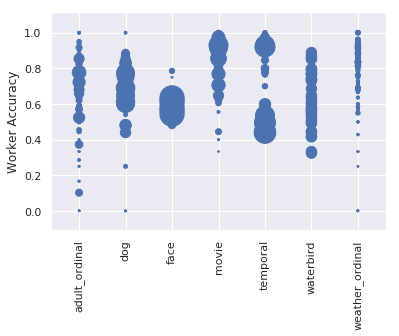

In [48]:
x_values = list(results.task)
y_values = list(results.mean_worker_acc)
s = list(results.num_questions)
# plt.figure(figsize=(2,4))

plt.scatter(x_values, y_values, s)
#             edgecolors='w')
plt.xticks(rotation='vertical')
plt.margins(0.1)
plt.ylabel('Worker Accuracy')

In [42]:
# sns.set()
# sns.relplot(x="task", 
#             y="mean_worker_acc", 
#             size="num_questions", 
#             data=results)

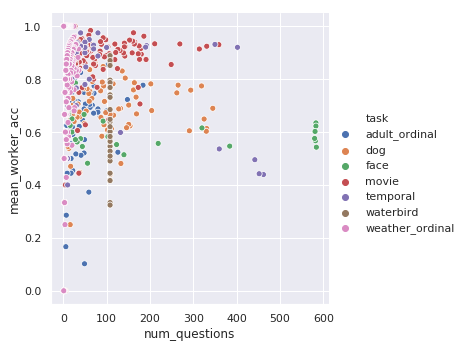

In [43]:
sns.relplot(x="num_questions", y="mean_worker_acc", hue='task', data=results);